In [33]:
import sys
sys.path.append('../')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.machinelearning import *
from src.rules import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
df = pd.read_csv('../data/sample.csv', index_col=0)
df.reset_index(drop=True, inplace=True)
print(f'Shape of the dataframe: {df.shape}')

target = 'Stability'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = data_preprocessing(df, target)

Shape of the dataframe: (372, 1411)


In [35]:
from src.rules import MyClass
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED).fit(X_train, y_train)
y_hat = model.predict(X_train)
tree_surr = train_tree_classifier(X_train, y_train)

In [24]:
c = MyClass(tree_clf=tree_surr, df=df, target='Stability')
c.get_rules()
c.clean_rules()
idxs = c.rule_to_python(X_test, 0)
print(y_test.loc[c.rule_to_python(X_test, 3)].shape)
y_test.loc[c.rule_to_python(X_test, 3)].value_counts(normalize=True)

(15, 1)


Stability
1.0          0.866667
0.0          0.133333
dtype: float64

### Experimentation area

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
X = pd.read_csv('../data/rekindle_data.csv')
y = pd.read_csv('../data/rekindle_stabilities.csv')
df = pd.concat([X, y], axis=1)
df['Stability'] = df['Stability'].replace(-1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2000, random_state=SEED, stratify=y)

df = pd.concat([X_train, y_train], axis=1)
df['Stability'] = df['Stability'].replace(-1, 0)
X = df.drop('Stability', axis=1)
y = df['Stability']

X_train, X_test, y_train, y_test = data_preprocessing(df, 'Stability')

class_names = y_train['Stability'].unique().astype(str)
feature_names = X_train.columns.values

In [30]:
model = XGBClassifier(random_state=SEED).fit(X_train, y_train)

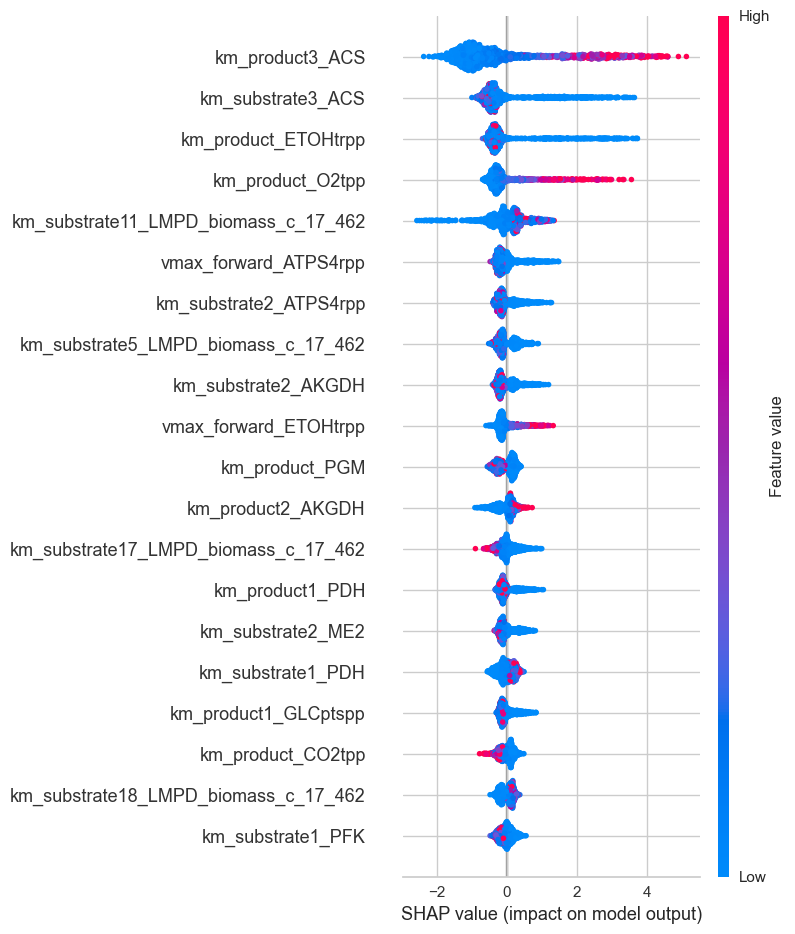

In [32]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='dot', 
                  class_names=class_names, feature_names=feature_names, show=True)